## Project : No Show Appointment
### Table of Contents
* #### Introduction
* #### Data Wrangling
* #### Exploratory Data Analysis
* #### Conclusion

### Introduction

#### An Analysis Investigating a dataset 

In this analysis we are going to investigate a dataset of a "no-show-appointment" originally obtained from kaggle.
The dataset and informations about the features with their description can be found here https://www.kaggle.com/datasets/joniarroba/noshowappointments 

The dataset consists of informations on the appointments of patients with medical personeels and whether the were able to show up or not with respect to their appointment.

This posed a questions of what important factors affect the show up of these patient, which will help you focus on relevant parts of the data so as to pay more attention towards more meaningful dependent features in our analysis.

### Wranging Data
In this process we are going to; 
  * Load our "noshowappointments" data which we downloaded from kaggle
    
  * View fews lines of our data to make sure our data is loaded correctly
    
  * Inspect our data; look at the shape of the data to know how many rows and columns in our dataset
    
  * Check for missing data, unique data and duplicated data if any
  
  * Cleaning the data


#### Properties
First we need to import the necessary packages needed for this project;

In [1]:
# import pandas numpy matplotlib and seaborn 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Loading the data and viewing data
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# viewing the shape of the data to know how many rows and columns in our dataset
df.shape

(110527, 14)

The above code shows there are **110527** rows which are patients and **14** columns which includes one dependent column that which tell whether a patient shows up or not

In [4]:
# Checking for missing data
df_missing = df.isnull().sum()
df_missing

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

We Created a variable **df_missing** which shows the number of null values in our data.
From code we see that our data has no missing values

In [5]:
# Checking for duplicates data 
df_duplicate = sum(df.duplicated())
df_duplicate

0

Like the the previous step which we created **df_missing** for missing data we also did the same to know if our data has a record that is duplicated. We did this by creating a **df_duplicate** variable which show that there are no duplicate records i.e no rows has exactly the same value in all their columns.

In [6]:
# Viewing the few lines of our data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# Checking to know the number of unique values in our dataset
df_unique = df.nunique()
df_unique

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

The code with variable **df_unique** show the unique valuesin each columns.

**N/B: The total number of patients is 110527**

From the result displayed, we can deduce the following;
* Gender, Scholarship, Hipertension, Diabetes, Alcoholism, SMS_recieved and No-shows columns has only *2* unique values i.e *True or False.*
* We have *5* Unique Handcap values
* We have *81* different Neighbourhoods where the appointment was made
* *104* different values of age
* *27* days/time duration in which appointments were registered
* *103549* different days/time in which patients has to visit the doctor for their appointments
* *110527* appointment ID which shows that for every appointment made, there is a unique ID set for the appointment since the total number of patients is equal to the number of AppointmentID.
* Lastly, there *62299* unique PatientID; this signifies that there is a conflict in the patientsID which shows that there are duplicates in values in the PatientID column since the number of patients i.e rows is not equal to the number of the PatientID


In [8]:
# Lets view the general descriptive statistics summary of our data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
# Lets generate a concise summary of the information contain in our dataset; showing the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Cleaning
From the general properties of our data we found some fews problems which can be cleaned before we proceed in exploring our data.

* In our data info we found that the dtypes our ScheduledDay and AppointmentDay are object so we need to convert it to datetime

* From our Unique Values we found our that the PatientID is duplicated i.e a Patient may have one or more Data

* For us to focus more on the more important features as posed in the question, we drop some indepedent columns


In [10]:
# Convert ScheduledDay to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

# Convert AppointmentDay to datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Recheck our info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

We have suceeded in changing our ScheduledDay and AppointmentDay dtypes to datetime

In [11]:
# dropping duplicates values in the PatientId array
df.drop_duplicates(subset='PatientId', keep='first', inplace=True, ignore_index=True)

In [12]:
# Rechecking the shape to confirm if the duplicates in the PatientId was dropped  
df.shape

(62299, 14)

In the above code we try to drop the duplicates data in the PatientId and rechecking the shape of our dataframe to confirm if the duplicates were actually dropped.
We found out that we are left with *62299* PatientId (rows) and *14* columns

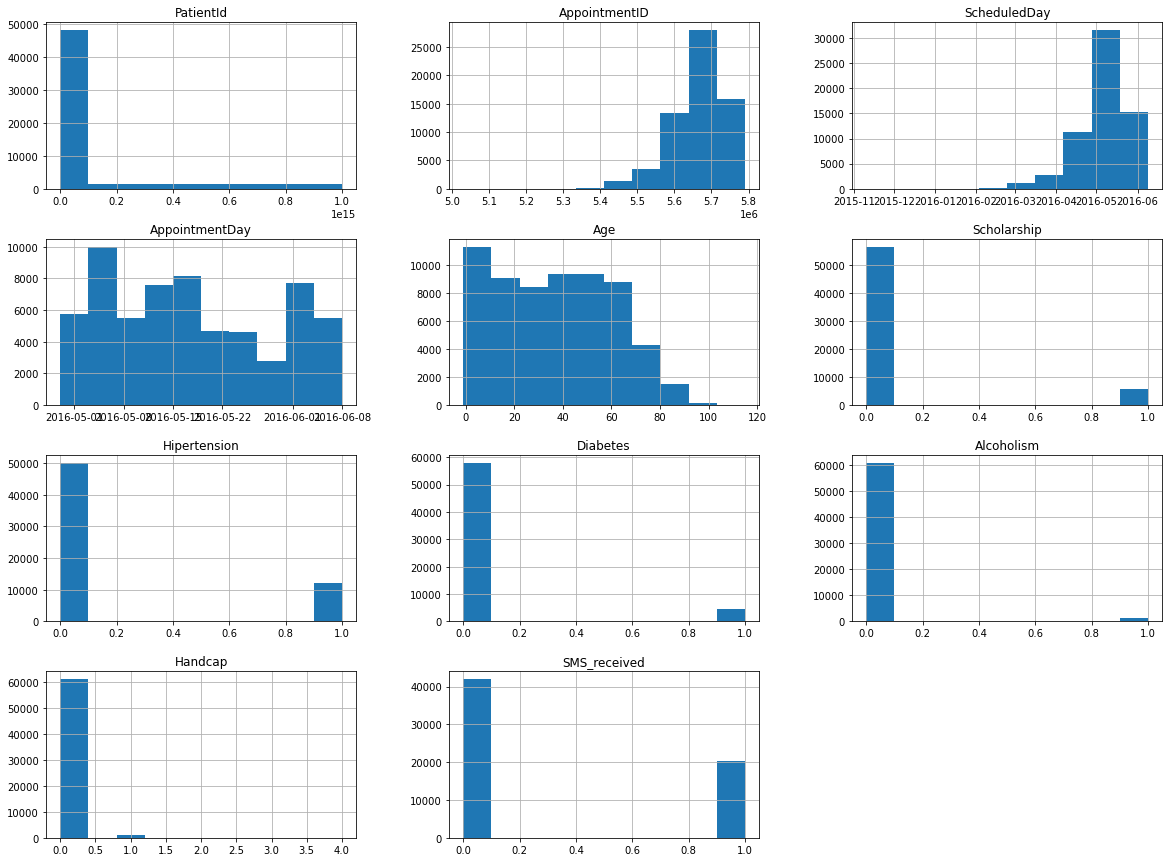

In [13]:
# Viewing the distribution of our data
df.hist(figsize=(20, 15));

The code above display the histogram of our the various features in our dataframe. This is important for us to know the more dependent feature in our dataframe and the features we can drop to focus our attention more on the needed dependent features  

In [14]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'Scholarship', 'Alcoholism', 'Handcap', 'Hipertension', 'Diabetes'], axis=1, inplace=True)

We've suceeded dropping *PatientId, AppointmentID, ScheduledDay, Scholarship, Alcoholism, Handcap, Hipertension, Diabetes

In [15]:
# Reviewing our dataset to check if the columns were dropped
df.head()

,Gender,AppointmentDay,Age,Neighbourhood,SMS_received,No-show
0,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,No
1,M,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,No
2,F,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,No
3,F,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,No
4,F,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,No


### Exploratory Data Analysis

#### Which variable mostly influences the dependent variable 

Now Let's show the distribution of our dependent variable 'No-show'

In [16]:
# Total number of patients who showed up and those who didn't 
df['No-show'].value_counts()

No     50106
Yes    12193
Name: No-show, dtype: int64

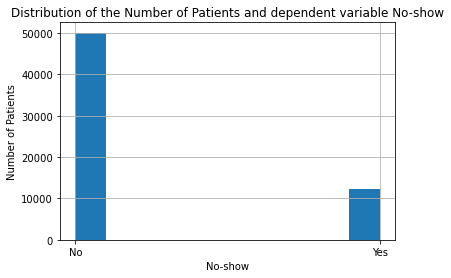

In [17]:
# Let's show the distribution of the No-show
df['No-show'].hist()
plt.xlabel('No-show')
plt.ylabel('Number of Patients')
plt.title('Distribution of the Number of Patients and dependent variable No-show');

We see from our distribution that about 20 percent of the patients didn't show up for their appointments

In [18]:
# Masking No-show arrays
show = df['No-show'] == 'No'
no_show = df['No-show'] == 'Yes'

Here we masked the dependent variable 'No-show', so that we differentiate the patients who showed up and those who did not. 

In [19]:
# Let's show the number of Male and female in our data 
df['Gender'].value_counts()

F    40046
M    22253
Name: Gender, dtype: int64

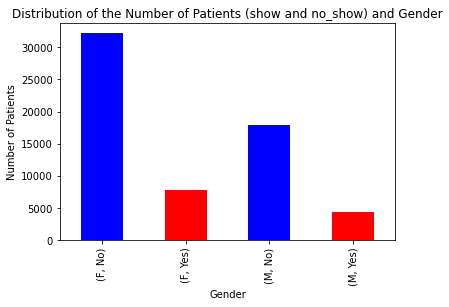

In [20]:
# Let's grouby Gender and compare it with the dependent variable(No-show)
cls = ['blue', 'red']
df.groupby('Gender')['No-show'].value_counts().plot(kind='bar', color=cls)
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.title('Distribution of the Number of Patients (show and no_show) and Gender');

Using the groupby function on gender we were able to see the distribution of the female and male who show up and those who didn't. The distribution above shows that the male is about 36% of the patients i.e the male are approximately half of the female in our dataset.

Now let's view the counts of the distribution of those who showed and those who didn't;

In [21]:
# No of males and females that showed up for their appointment
df.Gender[show].value_counts()

F    32218
M    17888
Name: Gender, dtype: int64

In [22]:
# No of males and females that that didn't show up for their appointment
df.Gender[no_show].value_counts()

F    7828
M    4365
Name: Gender, dtype: int64

In [23]:
# defining a function to avoid code repetition 
def plot_hist(df, arr1, arr2, show, no_show, title, x_label, y_label ):
    plt.hist(arr1, alpha=0.5, bins=10, label='show' )
    plt.hist(arr2, alpha=0.5, bins=10, label='no_show' )
    plt.title(title);
    plt.xlabel(x_label);
    plt.ylabel(y_label);
    plt.legend();
    plt.show()

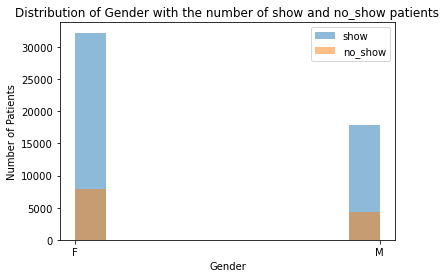

In [24]:
# comparing the Gender with the number of show and no_show patients by using the function we defined
plot_hist(df, df.Gender[show], df.Gender[no_show], show, no_show, 'Distribution of Gender with the number of show and no_show patients', 'Gender', 'Number of Patients')

We see from our distribution, 
* **32218** of females went for their appointment and **7828** didn't while;

* For the male **17888** showed and  **4365** didn't

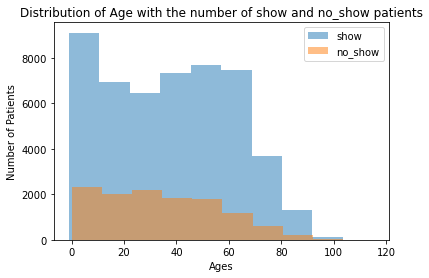

In [25]:
# comparing the Age with the number of show and no_show patients by calling the function we defined
plot_hist(df, df.Age[show], df.Age[no_show], show, no_show, 'Distribution of Age with the number of show and no_show patients', 'Ages', 'Number of Patients')

In [26]:
# Number of patient who received sms and those who didn't
df['SMS_received'].value_counts()

0    41905
1    20394
Name: SMS_received, dtype: int64

In [27]:
# Number of patient who received and those who didn,t sms and showed
df['SMS_received'][show].value_counts()

0    35203
1    14903
Name: SMS_received, dtype: int64

From the analysis of the code above 85% of the patients that didn't receive SMS showed up while, about 74% of the patients who received SMS showed up.
This shows that more of the patients that didn't receive SMS showed up for their appointment.

Now let's view this using a bar chart;

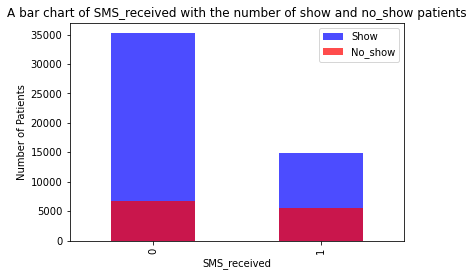

In [28]:
# Plotting SMS_received with our dependent variable
df['SMS_received'][show].value_counts().plot(kind='bar', alpha=0.7, color='blue', label='Show')
df['SMS_received'][no_show].value_counts().plot(kind='bar', alpha=0.7, color='red', label='No_show')
plt.title('A bar chart of SMS_received with the number of show and no_show patients')
plt.xlabel('SMS_received')
plt.ylabel('Number of Patients')
plt.legend();

### Does the Neighbourhood of the patients directly affects the patient show up?

Let's look at the different neighbourhood and how the Influences the number of patient who show up using a bar chart

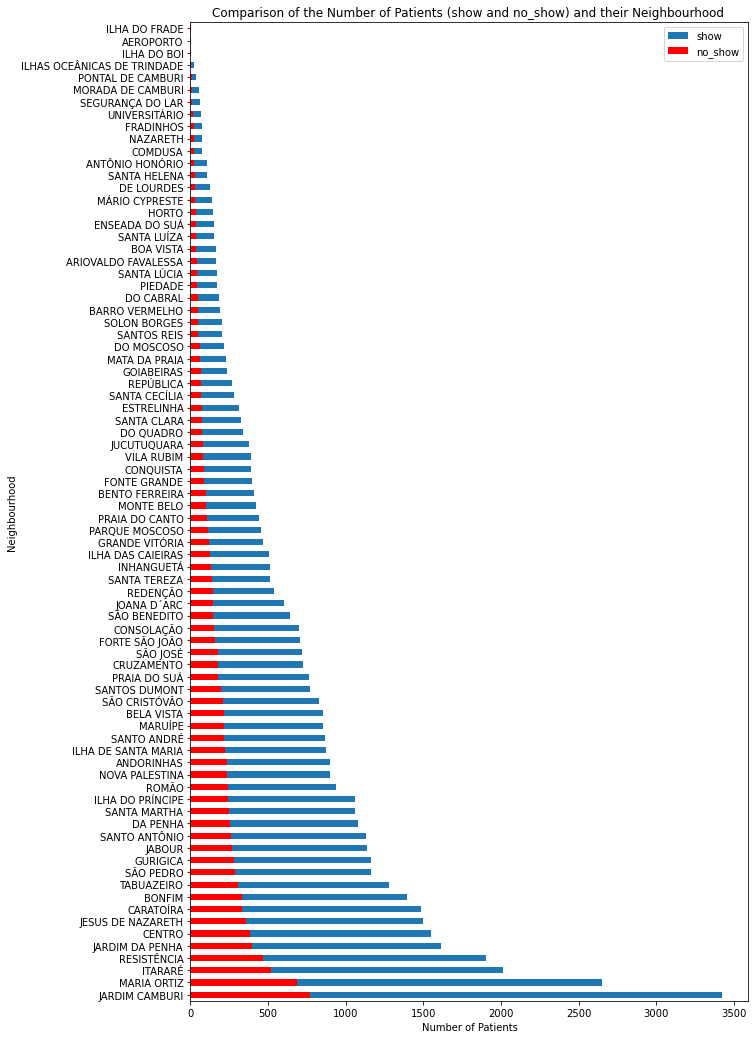

In [29]:
# Comparing the Neighbourhood and number of show and no_show using a bar chart
df['Neighbourhood'][show].value_counts().plot(kind='barh', figsize=(10, 18), label='show')
df['Neighbourhood'][no_show].value_counts().plot(kind='barh', color='red', figsize=(10, 18), label='no_show')
plt.xlabel('Number of Patients')
plt.ylabel('Neighbourhood')
plt.title('Comparison of the Number of Patients (show and no_show) and their Neighbourhood ')
plt.legend();

From our chart we see that people staying in the neighbourhood of JARDIM CAMBURI appear to show up more on their meeting that any other neighbourhood

### Conclusions

In summary, we had **110527** patients and **14** rows in our dataset. But during our analysis, we found out the following; 

* There were no missing values in our dataset
* We had patients having the same PatientId which we needed to clean up before exploring our dataset. 
  This made us to drop duplicates in the PatientId columns which resulted to us having only *62299* patients left.
* Out of the total *62299* patients, *50106* showed up while *12193* didn't
* The total number of females were *40046* and 32218 showed up for their appointments 
* The total number of males were *22253* and *17888* showed up.
* More people Showed up between the Age of *0-10* years and from *80* above showed up the least
* The number of people who didn't received SMS who twice more than the once that received
* People who didn't received SMS tends to be more people who showed up for their appointment
* Lastly, In the comparison of the neighbourhood with the number of patients who showed up for their appointments and those who didn't it appears that patients in JARDIM CAMBURI showed up most and patients in  ILHA DO FRADE, AEROPORTO and ILHA DO BOI didn't even show up for their appointments

From our analysis we tends to say that the neighbourhood of the patients greatly influences the *Show up* of the patients.

Futhermore, during our analysis we observed that there were duplicates PatientId with different data which was a limitation in our analysis because we had to keep only the first PatientId and drop it's duplicates.




